In [17]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Reading the file
import pandas as pd

df = pd.read_csv('C:\\Users\\elhaw\\JupyterLab Projects\\Final Project\\fifa19.csv')

# Check for columns with high percentage of missing values
missing_data = df.isnull().mean() * 100
columns_with_missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Drop columns with more than 50% missing values
df = df.drop(columns=columns_with_missing_data[columns_with_missing_data > 50].index)

# Fill missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Handle categorical columns by replacing missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert date columns to DateTime format
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Ensure correct data types
df['club_jersey_number'] = df['club_jersey_number'].astype(float)

df['BMI'] = df['weight_kgs'] / (df['height_cm'] / 100) ** 2

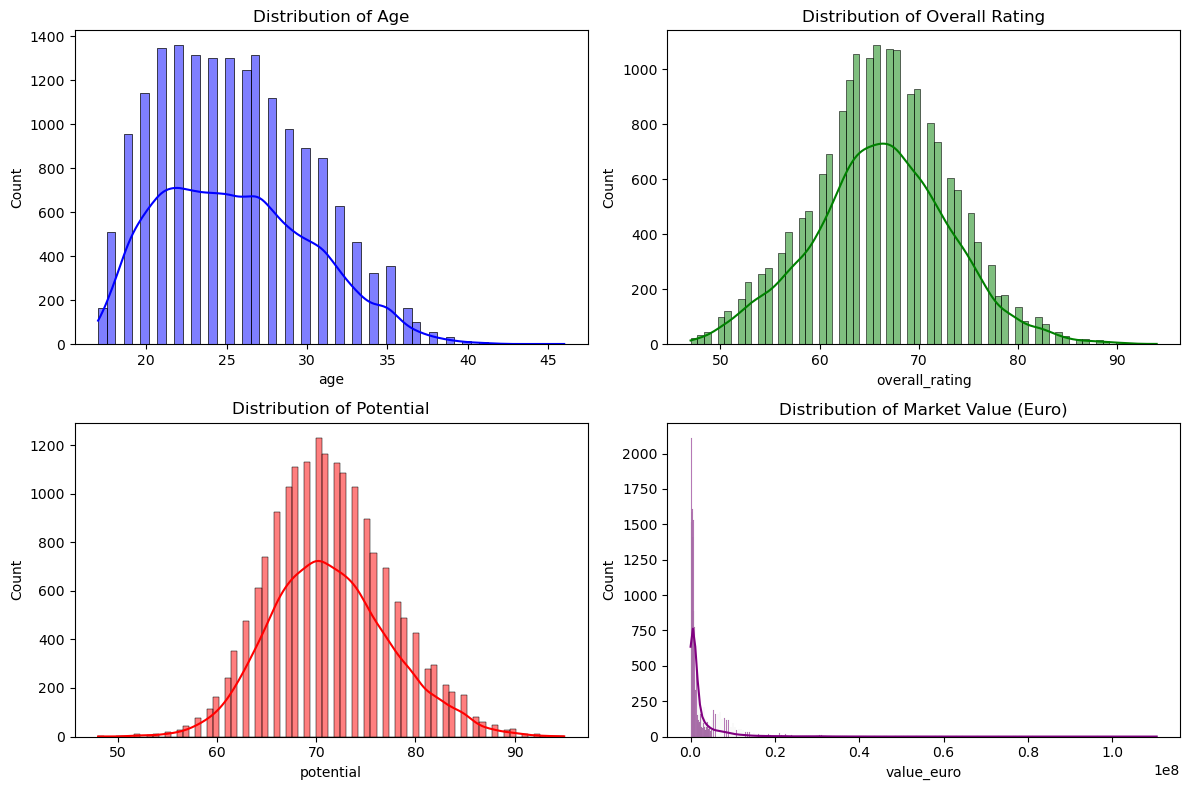

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for key attributes
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['overall_rating'], kde=True, color='green')
plt.title('Distribution of Overall Rating')

plt.subplot(2, 2, 3)
sns.histplot(df['potential'], kde=True, color='red')
plt.title('Distribution of Potential')

plt.subplot(2, 2, 4)
sns.histplot(df['value_euro'].dropna(), kde=True, color='purple')  # Drop NA values for plotting
plt.title('Distribution of Market Value (Euro)')

plt.tight_layout()
plt.show()

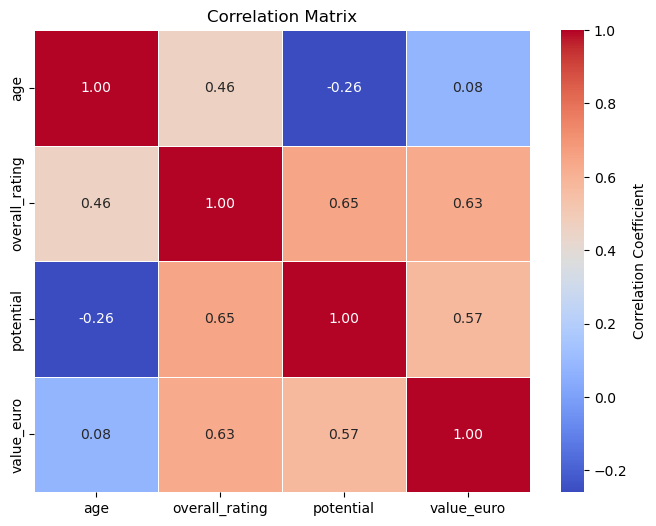

In [21]:
# Correlation matrix
correlation = df[['age', 'overall_rating', 'potential', 'value_euro']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

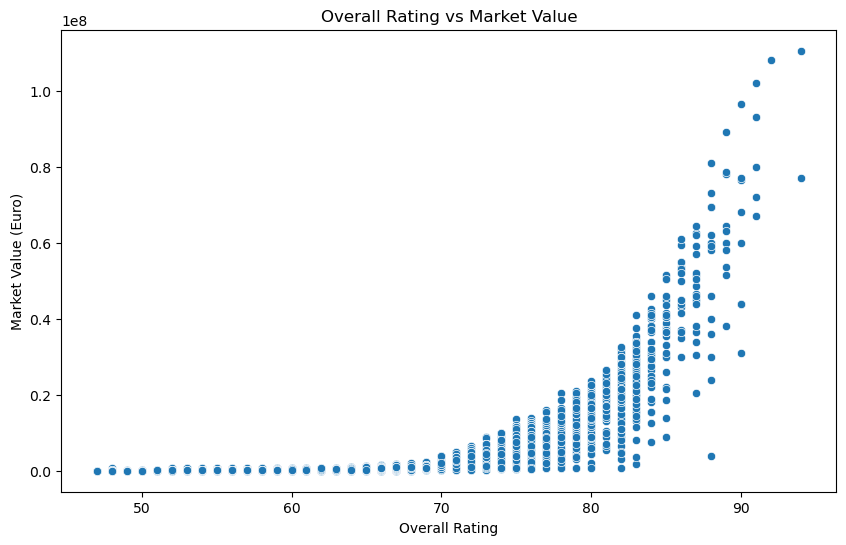

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_rating', y='value_euro', data=df)
plt.title('Overall Rating vs Market Value')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value (Euro)')
plt.show()

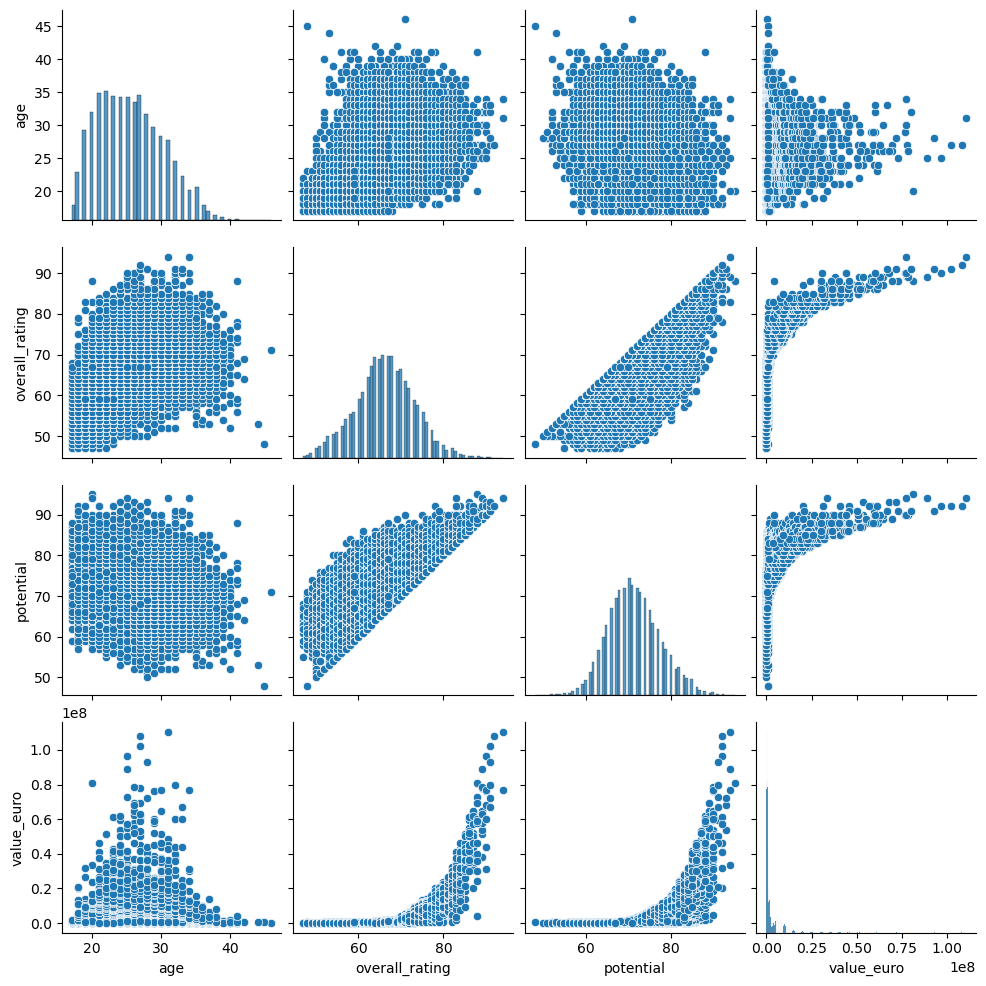

In [25]:
sns.pairplot(df[['age', 'overall_rating', 'potential', 'value_euro']])
plt.show()